# Heart Rate - Body Event - Body Health

## Library

In [16]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [17]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/heart_rate.json') as file:
    data = json.load(file)

## Event

### Heart Rate

Event date: June 28, 2024 at 11:02



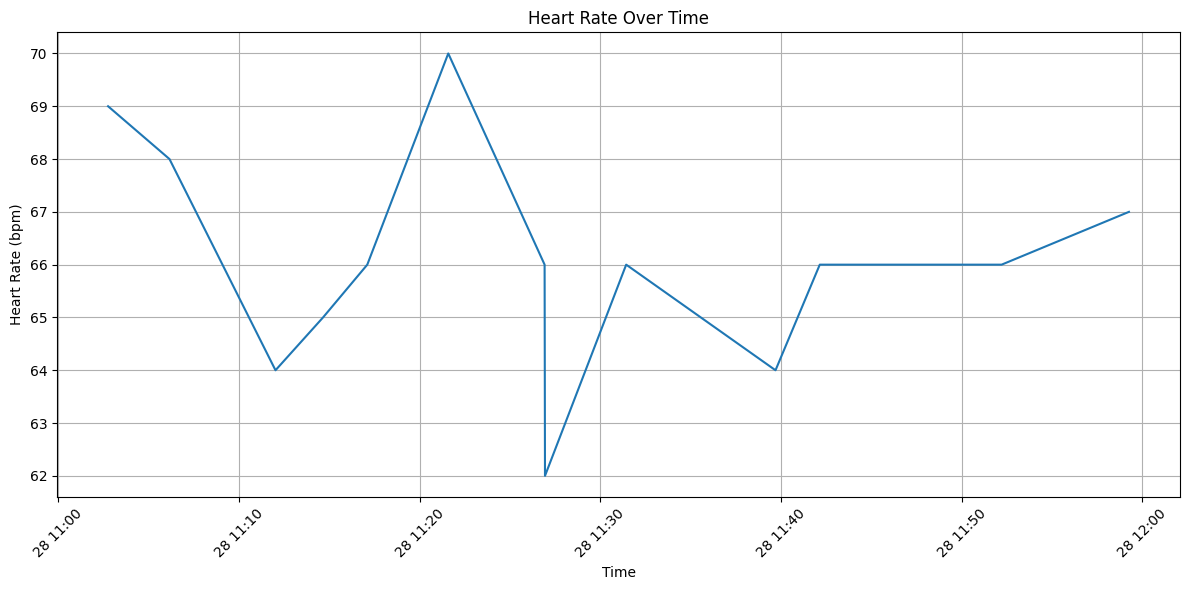

Heart Rate Average: 66 bpm.
Heart Rate Maximus: 70 bpm.
Heart Rate Minimus: 62 bpm.


In [20]:
hr_avg = data['body_health']['events']['heart_rate_event']['heart_rate']['hr_avg_bpm_int']
hr_max = data['body_health']['events']['heart_rate_event']['heart_rate']['hr_maximum_bpm_int']
hr_min = data['body_health']['events']['heart_rate_event']['heart_rate']['hr_minimum_bpm_int']
hr_granular = data['body_health']['events']['heart_rate_event']['heart_rate']['hr_granular_data_array']
original_date = data['body_health']['events']['heart_rate_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)
print(f"Event date: {translated_date}\n")

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular]
heart_rates = [item['hr_bpm_int'] for item in hr_granular]

if hr_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Heart Reate Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

# HR avg
if hr_avg is None:
    hr_avg_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_result = f'Heart Rate Average: {hr_avg} bpm.'

# HR maximus
if hr_max is None:
    hr_max_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_result = f'Heart Rate Maximus: {hr_max} bpm.'
    
# HR minimus
if hr_min is None:
    hr_min_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_result = f'Heart Rate Minimus: {hr_min} bpm.'

print(hr_avg_result)
print(hr_max_result)
print(hr_min_result)

### HRV

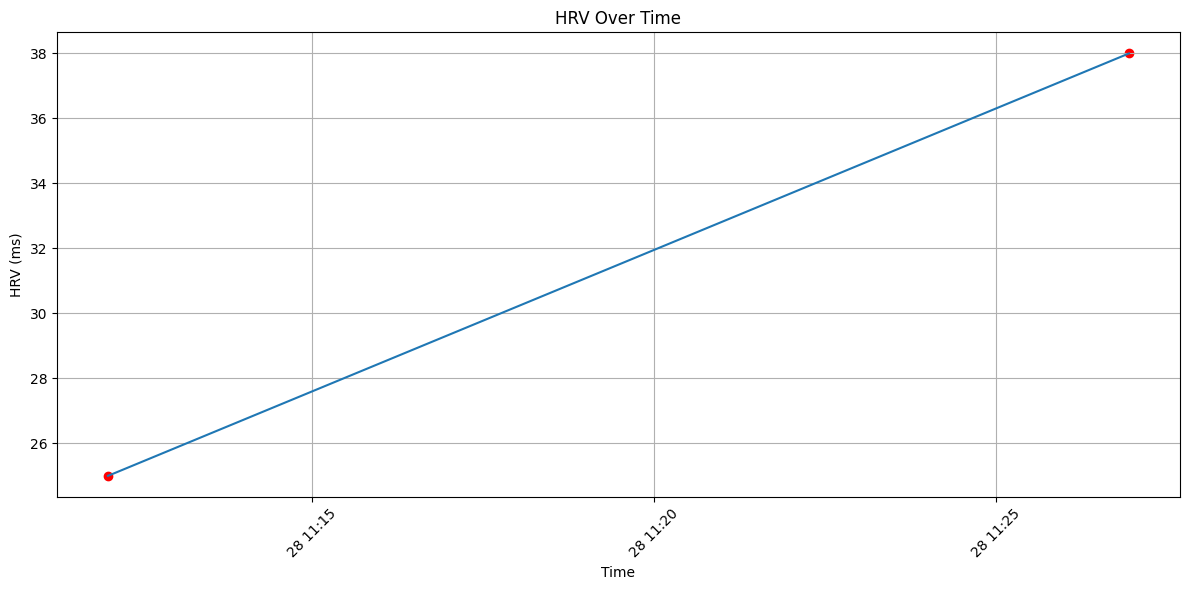

HRV Average: 32.0 bpm.


In [22]:
hrv_avg = data['body_health']['events']['heart_rate_event']['heart_rate']['hrv_avg_sdnn_float']
hrv_granular = data['body_health']['events']['heart_rate_event']['heart_rate']['hrv_sdnn_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hrv_granular]
heart_rates = [item['hrv_sdnn_float'] for item in hrv_granular]

if hrv_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.scatter(datetimes, heart_rates, color='red', label='Data points') 
    plt.title('HRV Over Time')
    plt.xlabel('Time')
    plt.ylabel('HRV (ms)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'HRV Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# HRV avg
if hrv_avg is None:
    hrv_avg_body_summary_result = "HRV Avg: No values ​​were obtained or it is null."
else:
    hrv_avg_body_summary_result = f'HRV Average: {hrv_avg} bpm.'

print(hrv_avg_body_summary_result)